In [80]:
df_info = pd.read_csv("data_Juno/webtoon_naver_info_by_genres_seperated.csv")
df_info.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,episode,omnibus,story,daily,comic,fantasy,action,drama,pure,sensibility,thrill,historical,sports
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,None,None,story,None,None,None,None,None,None,None,None,None,None
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,None,None,story,None,None,None,None,drama,None,sensibility,None,None,None
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,None,None,story,None,None,fantasy,None,drama,None,None,None,None,None
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,None,None,story,None,comic,None,None,drama,None,None,None,None,None
745,716164,로베스의 완전감각,정샛별,9.88,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.09.04,None,None,story,None,None,fantasy,action,None,None,None,None,None,None


In [81]:
df_info['count'] = 1

In [82]:
# 한글 폰트 적용
import matplotlib.font_manager as fm
font_location = "C:\\Windows\Fonts\malgunbd.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc("font", family=font_name)

Malgun Gothic


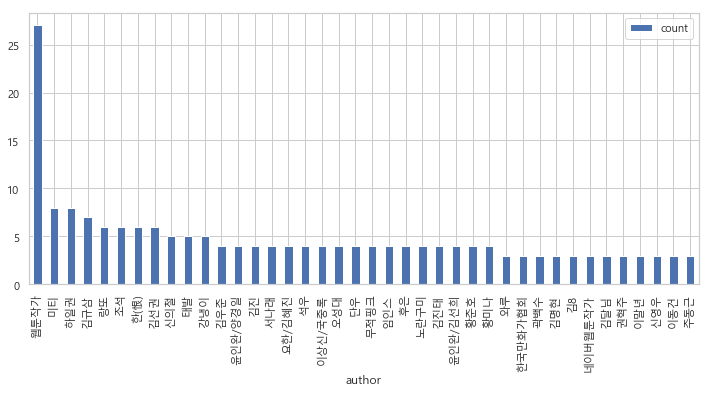

In [83]:
# 작가별 작품 수
author_count = df_info[['author','count']].groupby(['author']).sum().sort_values(by='count', ascending=False)
author_count[:40].plot(kind='bar',figsize=(12,5), )

In [134]:
# 작가별 평균 평점과 작품갯수
author_score_cnt = df_info[['author','total_score','count']].groupby(['author']).agg({'total_score':np.mean, 'count':np.sum})
author_score_cnt.tail()

,total_score,count
author,,
황준호/수연,9.940000,1
후렛샤/김홍태,9.956667,3
후렛샤/임진국,9.950000,1
후은,9.967500,4
히가시무라아키코,9.780000,1


In [138]:
author_score_cnt.sort_values(by=['total_score','count'], ascending=False)[:20]

,total_score,count
author,,
조현아,9.99,1
김칸비/황영찬,9.98,2
돌배,9.98,2
CRG/김규삼,9.98,1
QTT,9.98,1
cosmos/반지,9.98,1
까마중,9.98,1
나,9.98,1
남수,9.98,1


In [94]:
dic = {}
dic['column'] = []
dic['count'] = []
for column in df_info.columns[7:-1]:
    print(column)
    dic['count'].append(df_info[column].value_counts()[column])
    dic['column'].append(column)
dic

episode
omnibus
story
daily
comic
fantasy
action
drama
pure
sensibility
thrill
historical
sports


{'column': ['episode',
  'omnibus',
  'story',
  'daily',
  'comic',
  'fantasy',
  'action',
  'drama',
  'pure',
  'sensibility',
  'thrill',
  'historical',
  'sports'],
 'count': [114, 78, 554, 109, 177, 220, 87, 306, 97, 57, 104, 33, 12]}

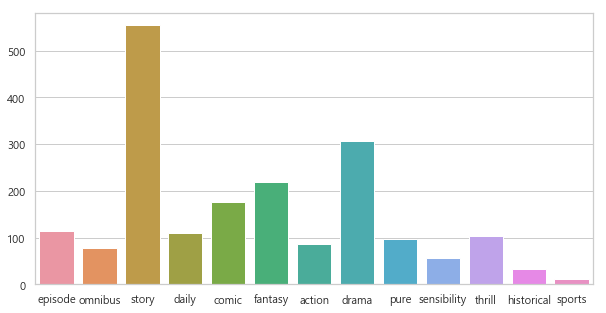

In [98]:
# 장르별 작품 수
plt.figure(figsize=(10,5))
sns.barplot(x=dic['column'], y=dic['count'])

In [99]:
# 작품별 장르 수
df_info2 = pd.read_csv("data_Juno/webtoon_naver_info_by_genres.csv")
df_info2.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,genre
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,story/pure/sensibility
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,story
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,story/drama/sensibility
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,story/fantasy/drama
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,story/comic/drama


In [140]:
# only 스토리 장르
df_info2[df_info2['genre'] == 'story'].size

135

In [101]:
import re

In [106]:
df_info2['genre_count'] = df_info2['genre'].map(lambda x :len(re.findall('/',x)) + 1)

In [122]:
genre_count = df_info2['genre_count'].value_counts().reset_index()
genre_count.sort_values(by='index', inplace=True)
genre_count.reset_index(drop=True, inplace=True)

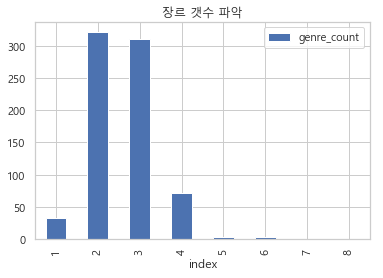

In [126]:
genre_count.plot(kind='bar', x='index', title="장르 갯수 파악")

한 개의 작품은 대부분 2~3개의 장르를 가지고 있다.

In [127]:
# 장르 갯수와 평점 상관관계
df_info2[['total_score','genre_count']].corr()

,total_score,genre_count
total_score,1.000000,0.104917
genre_count,0.104917,1.000000


In [141]:
df_chapter = pd.read_csv("data_Juno/episode_per_webtoon_naver.csv")
df_chapter.tail()

,title,image_link,episode,titleid,episode_cnt
54691,슈퍼트리오 시즌2,https://shared-comic.pstatic.net/thumb/webtoon...,Part 9. 의천검 탈취작전 1,347685,6
54692,슈퍼트리오 시즌2,https://shared-comic.pstatic.net/thumb/webtoon...,Part 8. 쌍감자 체포 프로젝트 2,347685,5
54693,슈퍼트리오 시즌2,https://shared-comic.pstatic.net/thumb/webtoon...,Part 8. 쌍감자 체포 프로젝트 1,347685,4
54694,슈퍼트리오 시즌2,https://shared-comic.pstatic.net/thumb/webtoon...,Part 7. 일천불의 화가 2,347685,3
54695,슈퍼트리오 시즌2,https://shared-comic.pstatic.net/thumb/webtoon...,Part 7. 일천불의 화가 1,347685,2


In [154]:
import requests
import json
from bs4 import BeautifulSoup
import time

In [150]:
def make_url(titleid, no, page):
    objectid = str(titleid) + "_" + str(no)
    return "https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?ticket=comic&templateId=webtoon&pool=cbox3&lang=ko&country=KR&objectId=" + str(objectid) + "&categoryId=&pageSize=100&page=" + str(page) + "&sort=NEW"

In [151]:
def cal_page(titleid,no,page=1):
    url = make_url(titleid, no, page)
    header = {
    'Host' : "apis.naver.com",
    'Referer' : "https://comic.naver.com/comment/comment.nhn?titleId=" + str(titleid) + "&no=" + str(no),
    'Content-Type' : "application/javascript"
    }
    response = requests.get(url, headers=header)
    dom = BeautifulSoup(response.content, 'html.parser')
    
    one = dom.text.find('(') + 1
#     two = dom.text.find(');')
    
    content = json.loads(dom.text[one:-2])
    comments = content['result']['count']['comment']
    return int(comments)

In [152]:
ls_all = df_chapter[['titleid','episode_cnt']].values

In [155]:
total_comments = np.array([cal_page(ls[0], ls[1]) for ls in ls_all])

SSLError: HTTPSConnectionPool(host='apis.naver.com', port=443): Max retries exceeded with url: /commentBox/cbox/web_naver_list_jsonp.json?ticket=comic&templateId=webtoon&pool=cbox3&lang=ko&country=KR&objectId=651673_336&categoryId=&pageSize=100&page=1&sort=NEW (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),))

In [ ]:
df_chapter['total_comments'] = total_comments